In [2]:
from importlib import reload 
import sys
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr, kendalltau
import plotly.express as px
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.spatial.distance import braycurtis
from scipy.special import softmax
import seaborn as sns
# # adding Folder_2 to the system path
# sys.path.insert(0, r'C:\Users\tomer\Desktop\BSc\year3\sem B\workshop_microbiome\code')
# # sys.path.insert(0, r'C:\Users\yuvald\Documents\Uni\סמסטר ב\workshop_microbiome\code')

from imports import  *

import social_model_class
reload(social_model_class)


<module 'social_model_class' from 'c:\\Users\\yuvald\\Documents\\Uni\\סמסטר ב\\workshop_microbiome\\Milestone2\\social_model_class.py'>

In [3]:
data_path = r"train_data.csv"
metadata_path = r"train_metadata.csv"

$$\Delta_t  \space windowing$$

In [4]:
model = social_model_class.superModel(data_path, metadata_path)

c:\Users\yuvald\Documents\Uni\סמסטר ב\workshop_microbiome\Milestone2\social_model_class.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata_clean["collection_date"] = (pd.to_datetime(metadata_clean['collection_date']) - pd.Timestamp('1970-01-01')).dt.days


In [5]:
model.baboons[0].fit(np.array([1/3]*61))

(array([8.19528192e-03, 5.68560514e-01, 5.91732774e-01, 4.80968848e-01,
        9.80109216e-41, 6.66666667e-01, 6.66100072e-01, 5.79728080e-01,
        4.79090823e-01, 1.48784637e-02, 6.66666395e-01, 5.70642468e-01,
        4.49684586e-01, 5.47802157e-01, 2.43265453e-01, 3.88368392e-01,
        4.87722117e-01, 2.58774784e-01, 7.47371490e-02, 4.42414687e-01,
        3.93965535e-01, 5.47460992e-01, 5.97136136e-01, 4.50262330e-01,
        4.46814091e-01, 3.44845956e-01, 4.25647541e-01, 5.69131105e-01,
        3.01716173e-01, 5.15981982e-01, 5.38840189e-01, 4.55727375e-01,
        5.23286399e-01, 4.07250586e-01, 4.18814261e-01, 4.85834770e-01,
        4.03471922e-01, 5.09466877e-02, 3.35538055e-01, 2.78766795e-01,
        5.62259755e-01, 6.66666641e-01, 6.25342656e-01, 5.41176938e-01,
        5.15906788e-01, 1.52631884e-01, 4.01721100e-01, 4.56858379e-01,
        3.55844166e-01, 6.36230132e-01, 5.79079331e-01, 6.29725302e-01,
        5.36157431e-01, 6.66666569e-01, 5.10287018e-01, 5.432923

In [29]:
metadata_df = pd.read_csv(metadata_path)
data_df = pd.read_csv(data_path)

metadata_df["collection_date"] = pd.to_datetime(metadata_df["collection_date"])

In [30]:
metadata_df.set_index('sample', inplace=True)
data_df.set_index('sample', inplace=True)

In [24]:
baboon_101 = social_model_class.BaboonModel('Baboon_101',data_df, metadata_df)

c:\Users\yuvald\Documents\Uni\סמסטר ב\workshop_microbiome\Milestone2\social_model_class.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  self.mean_social.loc[sample] = data[(metadata['social_group'] == social_group) & (metadata["baboon_id"]!=self.baboon_id) & (abs((pd.to_datetime(metadata['collection_date']) - date).dt.days)<=delta_t_social_group)].mean()
c:\Users\yuvald\Documents\Uni\סמסטר ב\workshop_microbiome\Milestone2\social_model_class.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  self.mean_other.loc[sample] = data[(metadata['social_group'] != social_group) & (metadata["baboon_id"]!=self.baboon_id) & (abs((pd.to_datetime(metadata['collection_date']) - date).dt.days)<=delta_t_other)].mean()
c:\Users\yuvald\Documents\Uni\סמסטר ב\workshop_microbiome\Milestone2\social_model_class.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  self.mean_social.loc[sample] = data[(metadata['

In [25]:
alpha = np.array([1/30]*61)
x = baboon_101.fit(alpha)

In [26]:
x

(array([0.09611458, 0.22076176, 0.42162175, 0.25408694, 0.05899283,
        0.90269222, 0.26214912, 0.94209653, 0.34958596, 0.03112753,
        0.75085928, 0.24998055, 0.31917054, 0.34106562, 0.14325918,
        0.20368918, 0.301239  , 0.49166831, 0.06848189, 0.54814323,
        0.20038434, 0.49615001, 0.39310702, 0.30948996, 0.35666652,
        0.48106585, 0.34806252, 0.15436157, 0.23146322, 0.45974811,
        0.43441452, 0.03747146, 0.38445689, 0.19473138, 0.56800898,
        0.23311454, 0.45208604, 0.74085381, 0.17649293, 0.29140098,
        0.8008093 , 0.74427281, 0.71545367, 0.42571427, 0.50565067,
        0.14306891, 0.45675151, 0.56199826, 0.06140605, 0.69735054,
        0.37842411, 0.51899148, 0.29946937, 0.58945933, 0.43521824,
        0.61850563, 0.51640106, 0.17270729, 0.49558187, 0.22930404,
        0.96659937]),
 0.30746672474841585)

In [10]:
metadata_df["collection_date_datetime"] = pd.to_datetime(metadata_df["collection_date"])

In [16]:
metadata_df.drop_duplicates(subset=["baboon_id", "collection_date"], inplace=True)

In [31]:
time_samples_df = metadata_df[["social_group", "collection_date_datetime"]].copy()

In [32]:
time_samples_df["delta_t_cnt"] = 0

In [55]:
for group in time_samples_df["social_group"].unique():
    for t in time_samples_df["collection_date_datetime"][time_samples_df["social_group"] == group]:
        count = len(time_samples_df[(time_samples_df["social_group"]==group) & (abs(time_samples_df["collection_date_datetime"]-t).dt.days<=10)])
        time_samples_df["delta_t_cnt"][(time_samples_df["social_group"]==group) & (time_samples_df["collection_date_datetime"]==t)] = count
time_samples_df.drop_duplicates(inplace=True)

C:\Users\yuvald\AppData\Local\Temp\ipykernel_27048\1406703913.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_samples_df["delta_t_cnt"][(time_samples_df["social_group"]==group) & (time_samples_df["collection_date_datetime"]==t)] = count
C:\Users\yuvald\AppData\Local\Temp\ipykernel_27048\1406703913.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_samples_df["delta_t_cnt"][(time_samples_df["social_group"]==group) & (time_samples_df["collection_date_datetime"]==t)] = count
C:\Users\yuvald\AppData\Local\Temp\ipykernel_27048\1406703913.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

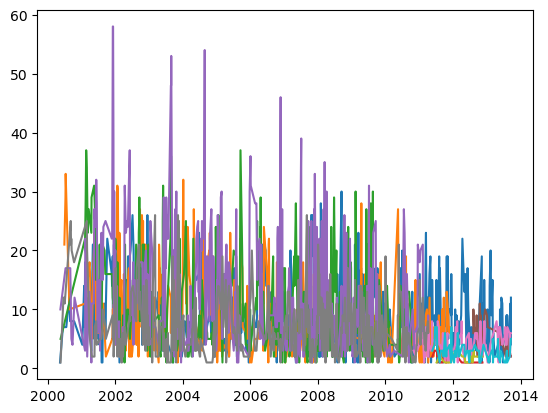

In [56]:
for group in time_samples_df["social_group"].unique():
    plt.plot(sorted(time_samples_df["collection_date_datetime"][time_samples_df["social_group"]==group]), time_samples_df["delta_t_cnt"][time_samples_df["social_group"]==group], label=group)


In [28]:
for t in time_samples_df.index:
    delta_t_datetimes = [i for i in range(t-7,t+7)]
    time_samples_df[""]

,social_group
collection_date_datetime,
2001-05-03,g_1.22
2001-05-19,g_1.22
2001-05-23,g_1.22
2001-07-30,g_1.22
2001-08-06,g_1.22
...,...
2010-09-18,g_1.21
2010-12-11,g_1.21
2011-01-14,g_1.21


In [27]:
time_samples_df.loc[pd.to_datetime('2000-05-19')]

,social_group
collection_date_datetime,
2000-05-19,g_2.1
2000-05-19,g_1.1


In [23]:
resampled_df

collection_date_datetime,2000-05-13,2000-05-17,2000-05-19,2000-05-20,2000-05-24,2000-05-26,2000-05-27,2000-05-31,2000-06-02,2000-06-03,...,2013-08-28,2013-08-31,2013-09-02,2013-09-04,2013-09-07,2013-09-09,2013-09-11,2013-09-14,2013-09-16,2013-09-18
social_group,,,,,,,,,,,,,,,,,,,,,
g_1.1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
g_1.11,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,2,0,0,1,0
g_1.12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
g_1.21,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
g_1.211,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,2
g_1.22,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,6,0,0
g_2.1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
g_2.11,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
g_2.12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
